In [1]:
## Abstractions
import numpy as np
import pandas as pd

## Plotting
from matplotlib import pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
import pylab as pl

## Scalers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

## Models
from sklearn.linear_model import LogisticRegression

## Model Selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import det_curve

## Timing
import time

# Model
from BayesianLogisticRegression_SOSGD import MAPEstimator

Import Data

In [2]:
headers = ['molecule_name', 'conformation_name']
for i in range(1, 167):
    name = 'f%i' % i
    headers.append(name)
headers.append('class')

In [3]:
# headers = pd.read_csv('clean2.info')
df = pd.read_csv('src/clean2.data')
df.columns = headers

In [4]:
X = np.asarray(df.iloc[:,2:-1])
y = np.asarray(df.iloc[:,-1])

Standard Scaler

In [5]:
X_std = StandardScaler().fit_transform(X)

Train and Test Model

In [6]:
clf = MAPEstimator(w_D = np.zeros(166), step_size=0.001, alpha=0.1, max_iter = 1000, tol = 0.00000001)
clf.fit(X_std,y)
predict_y = clf.predict_proba(X_std)

In [8]:
score = clf.score(X_std, y)
score

0.8459906017886918

In [9]:
(np.sum(y==0)) / len(y)

0.8459906017886918

In [10]:
np.sum(y==1)

1016

In [11]:
clf.iteration_count

2

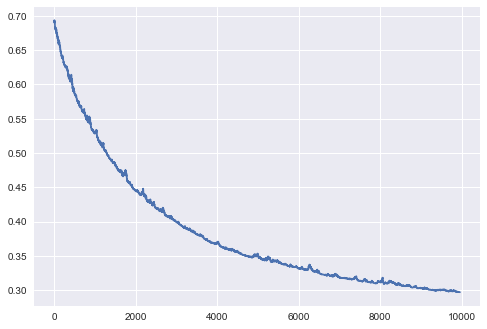

In [76]:
plt.plot(clf.loss_array)

In [77]:
clf = MAPEstimator(w_D = np.zeros(166), step_size=0.001, alpha=0.1, max_iter = 100000, tol = 0.00000001, step_size_type = 'differential')
clf.fit(X_std,y)
predict_y = clf.predict_proba(X_std)

In [78]:
score = clf.score(X_std, y)
score

0.8669092011520388

In [79]:
(np.sum(y==0)) / len(y)

0.8459906017886918

In [80]:
clf.iteration_count

27815

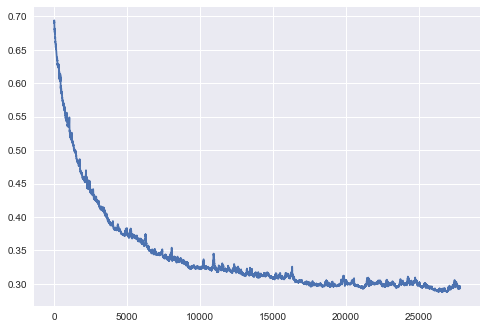

In [81]:
plt.plot(clf.loss_array)

Model Evaluation

In [53]:
kf = KFold(n_splits=10, shuffle = True, random_state = 136)
kf.get_n_splits(X_std, y)

10

In [54]:
#First-Order Gradient Descent K-fold cross validation

iteration_counts = []
iteration_times = []
test_scores = []
threshold = 0.8

for train_index, test_index in kf.split(X_std, y):
    X_train, X_test = X_std[train_index], X_std[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = MAPEstimator(w_D = np.zeros(166), step_size=0.001, alpha=0.1, max_iter = 100000, tol = 0.00000001)
    start_time = time.time()
    clf.fit(X_train,y_train)
    end_time = time.time()
    converge_time = end_time - start_time
    iteration_times.append(converge_time)
    iteration_counts.append(clf.iteration_count)
    score = clf.score(X_test, y_test, threshold)
    test_scores.append(score)
    

In [55]:
test_scores

[0.9136363636363637,
 0.9136363636363637,
 0.9287878787878788,
 0.9227272727272727,
 0.9272727272727272,
 0.9166666666666666,
 0.9227272727272727,
 0.9226100151745068,
 0.9195751138088012,
 0.9377845220030349]

In [56]:
iteration_counts

[9485, 18253, 9619, 11857, 19341, 29322, 6679, 13448, 14238, 19559]

In [57]:
fogd_accuracy = test_scores

In [58]:
fogd_iteration_counts = iteration_counts

In [59]:
fogd_iteration_times = iteration_times

In [60]:
np.mean(basic_test_scores)

0.9225424196440889

In [61]:
np.mean(basic_iteration_counts)

15180.1

In [62]:
np.mean(iteration_times)

6.2845050573349

In [63]:
kf = KFold(n_splits=10, shuffle = True, random_state = 136)
kf.get_n_splits(X_std, y)

10

In [64]:
#fogd cross validation with differential step sizes

# iteration_counts = []
# test_scores = []

# for train_index, test_index in kf.split(X_std, y):
#     X_train, X_test = X_std[train_index], X_std[test_index]
#     y_train, y_test = y[train_index], y[test_index]
#     clf = MAPEstimator(w_D = np.zeros(166), step_size=0.001, alpha=0.1, max_iter = 100000, tol = 0.00000001, step_size_type = 'differential')
#     clf.fit(X_train,y_train)
#     iteration_counts.append(clf.iteration_count)
#     score = clf.score(X_test, y_test)
#     test_scores.append(score)
    

In [65]:
#Second-Order Gradient Descent cross validation TBD

iteration_counts = []
iteration_times = []
test_scores = []
threshold = 0.8

for train_index, test_index in kf.split(X_std, y):
    X_train, X_test = X_std[train_index], X_std[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = MAPEstimator(w_D = np.zeros(166), step_size=0.001, alpha=0.1, max_iter = 100000, tol = 0.00000001)
    start_time = time.time()
    clf.fit(X_train,y_train)
    end_time = time.time()
    converge_time = end_time - start_time
    iteration_times.append(converge_time)
    iteration_counts.append(clf.iteration_count)
    score = clf.score(X_test, y_test, threshold)
    test_scores.append(score)

In [66]:
test_scores

[0.9136363636363637,
 0.9136363636363637,
 0.9287878787878788,
 0.9227272727272727,
 0.9272727272727272,
 0.9166666666666666,
 0.9227272727272727,
 0.9226100151745068,
 0.9195751138088012,
 0.9377845220030349]

In [51]:
iteration_counts

[9485, 18253, 9619, 11857, 19341, 29322, 6679, 13448, 14238, 19559]

In [94]:
sogd_test_scores = test_scores

In [95]:
sogd_iteration_counts = iteration_counts

In [ ]:
sogd_iteration_times = iteration_times

In [96]:
np.mean(sogd_test_scores)

0.8741934519703867

In [97]:
np.mean(sogd_iteration_counts)

13270.4

In [52]:
plot_test_scores = np.array([fogd_test_scores, sogd_test_scores])

NameError: name 'fogd_test_scores' is not defined

In [101]:
plot_iteration_counts = np.array([fogd_iteration_counts, sogd_iteration_counts])

In [ ]:
plot_iteration_counts = np.array([fogd_iteration_times, sogd_iteration_times])

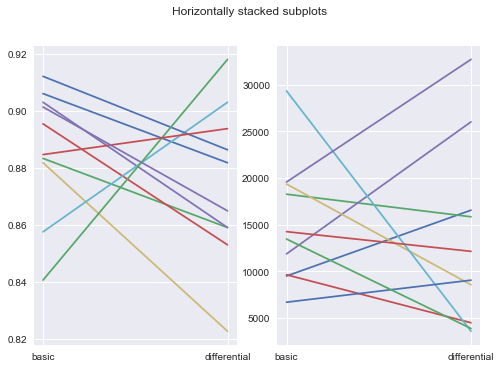

In [102]:
# fig, (ax1, ax2) = plt.subplots(1, 2)
# fig.suptitle('Horizontally stacked subplots')
# ax1.plot(['basic','differential'],plot_test_scores)
# ax2.plot(['basic','differential'], plot_iteration_counts)

Text(0, 0.5, 'Accuracy Rate on Held-out Data')

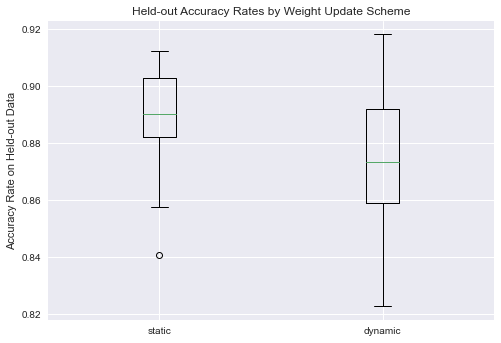

In [103]:
plt.boxplot(np.transpose(plot_test_scores), labels = ['static', 'dynamic'])
plt.title('Held-out Accuracy Rates by Weight Update Scheme')
plt.ylabel('Accuracy Rate on Held-out Data')

Text(0, 0.5, 'Number of Iterations until Convergence (Millions)')

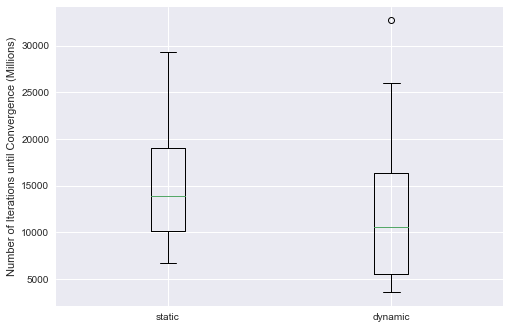

In [104]:
plt.boxplot(np.transpose(plot_iteration_counts), labels = ['static', 'dynamic'])
plt.ylabel('Number of Iterations until Convergence (Millions)')

In [105]:
plot_test_scores

array([[0.90606061, 0.88333333, 0.89545455, 0.9030303 , 0.88181818,
        0.85757576, 0.91212121, 0.84066768, 0.88467375, 0.90136571],
       [0.88181818, 0.85909091, 0.8530303 , 0.85909091, 0.82272727,
        0.9030303 , 0.88636364, 0.91805766, 0.89377845, 0.86494689]])

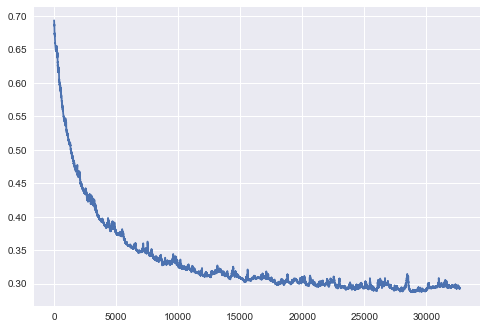

In [106]:
plt.plot(clf.loss_array)

In [107]:
clf = LogisticRegression(penalty="none", solver = 'sag', max_iter = 100000)

In [108]:
clf.fit(X_std,y)
predict_y = clf.predict_proba(X_std)

In [120]:
score = clf.score(X_std, y)
score

0.9041988782780052

In [121]:
sk_weights = clf.coef_[0]

AttributeError: 'MAPEstimator' object has no attribute 'coef_'

In [122]:
clf.w_D

array([-1.29698224e-01, -2.53604929e-02,  3.61302927e-02, -2.43836000e-02,
       -7.08463776e-02, -1.73228269e-02,  2.48353706e-02, -1.44586977e-02,
        4.61045261e-02,  1.57887558e-02,  3.97900608e-03, -9.77666107e-03,
       -4.08462748e-02, -2.68847740e-02, -2.71383118e-02, -4.41245407e-02,
        5.76777183e-02,  4.46755905e-03, -2.77688563e-02,  8.66189746e-03,
        2.15315841e-02,  1.11999463e-02,  1.66303748e-02,  4.99375435e-02,
       -5.63773330e-03,  4.24284228e-02, -8.60623763e-03, -2.56770263e-02,
       -1.76452975e-02,  2.50353510e-02, -1.20172752e-01, -6.65467895e-02,
       -1.54523279e-03,  2.43120844e-02, -2.54477493e-02, -1.92653432e-01,
       -6.72492748e-02,  2.38248341e-03,  3.04561918e-02, -4.37936008e-02,
        6.43484165e-02, -2.47075809e-02,  1.00071593e-03, -1.85606888e-02,
       -2.14985378e-02, -2.09033238e-02, -6.27926811e-02,  3.04750819e-02,
       -4.13557575e-02,  5.16370739e-02,  2.72394589e-02,  3.56035246e-02,
        3.46625242e-02, -

In [123]:
clf.intercept_

AttributeError: 'MAPEstimator' object has no attribute 'intercept_'

In [124]:
clf.c

-1.5123348031260848

In [125]:
y_pred = clf.predict_proba(X_std)

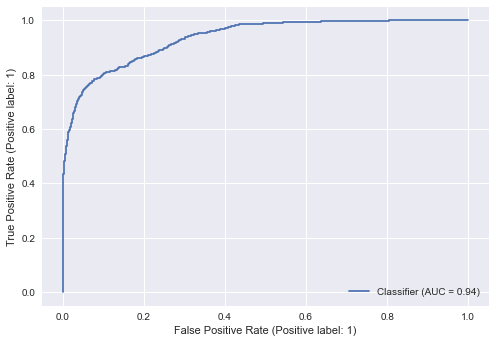

In [126]:
RocCurveDisplay.from_predictions(y, y_pred)

In [127]:
fpr, fnr, thresholds = det_curve(y, y_pred)

In [128]:
fpr

array([8.05411217e-01, 8.05411217e-01, 8.05232037e-01, ...,
       3.58358717e-04, 1.79179359e-04, 0.00000000e+00])

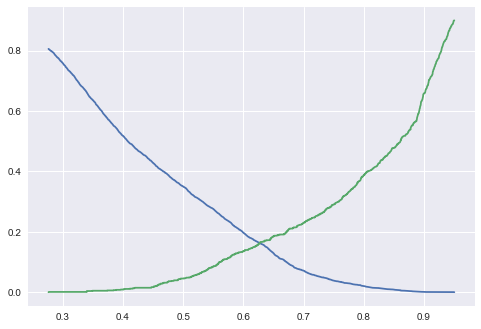

In [129]:
plt.plot(thresholds, fpr)
plt.plot(thresholds, fnr)

In [131]:
clf = MAPEstimator(w_D = np.zeros(166), step_size=0.001, alpha=0.1, max_iter = 100000, tol = 0.00000001)
clf.fit(X_std,y)
predict_y = clf.predict_proba(X_std)

In [21]:
x_axis = []
y_axis = []
for i in np.linspace(0.7,0.9,101):
    score = clf.score(X_std, y, i)
    x_axis.append(i)
    y_axis.append(score)
    print(i,'\t\t\t',score)

0.7 			 0.9041988782780052
0.702 			 0.906472639078369
0.704 			 0.9073821433985145
0.706 			 0.9087463998787327
0.708 			 0.9099590723055935
0.71 			 0.9110201606790965
0.712 			 0.9117780809458845
0.714 			 0.91268758526603
0.716 			 0.9129907533727452
0.718 			 0.9140518417462483
0.72 			 0.9142034257996059
0.722 			 0.915264514173109
0.724 			 0.9161740184932545
0.726 			 0.9163256025466121
0.728 			 0.9172351068667576
0.73 			 0.9179930271335456
0.732 			 0.9176898590268304
0.734 			 0.9181446111869032
0.736 			 0.9182961952402607
0.738 			 0.9181446111869032
0.74 			 0.918902531453691
0.742 			 0.9205699560406245
0.744 			 0.9210247082006973
0.746 			 0.9219342125208428
0.748 			 0.9220857965742004
0.75 			 0.9229953008943459
0.752 			 0.9234500530544186
0.754 			 0.923298469001061
0.756 			 0.9234500530544186
0.758 			 0.924056389267849
0.76 			 0.924056389267849
0.762 			 0.924056389267849
0.764 			 0.9239048052144915
0.766 			 0.9237532211611339
0.768 			 0.924814309534637
0.7

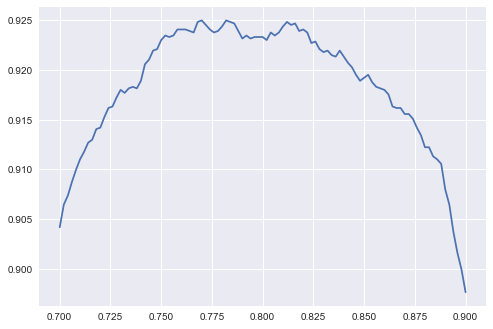

In [22]:
plt.plot(x_axis, y_axis)

In [31]:
1.75 * (X_std[5054][:,np.newaxis] @ X_std[5054][:,np.newaxis].T) + 1e-6

array([[ 0.32499431,  0.04874593,  0.7751828 , ...,  0.04809679,
         0.0767304 , -0.69103699],
       [ 0.04874593,  0.00731213,  0.11626856, ...,  0.00721477,
         0.01150945, -0.10364605],
       [ 0.7751828 ,  0.11626856,  1.84898312, ...,  0.11472022,
         0.18301779, -1.6482793 ],
       ...,
       [ 0.04809679,  0.00721477,  0.11472022, ...,  0.0071187 ,
         0.01135619, -0.10226577],
       [ 0.0767304 ,  0.01150945,  0.18301779, ...,  0.01135619,
         0.01811645, -0.16314983],
       [-0.69103699, -0.10364605, -1.6482793 , ..., -0.10226577,
        -0.16314983,  1.4693651 ]])